<a href="https://colab.research.google.com/github/ParastooHam/Jump-Start-RL/blob/main/JSRL_FinalResult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple RL to create a policy**

In [ ]:
from numpy import savetxt
from numpy import loadtxt
import numpy as np
import random
import time
from IPython.display import clear_output
import progressbar
import matplotlib.pyplot as plt
from FooEnv import FooEnv

In [ ]:
start = np.array([0,1,1,0.0,0.0]) 
state_space_size = 20
action_space_size = 15
q_table = np.zeros((state_space_size,action_space_size))
num_episodes = 100
max_steps_per_episode = 1000 
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = 0.1 #(max_exploration_rate - min_exploration_rate)/num_episodes
rewards_all_episodes = [] 
cost_all_1= []
state_all=[]
major_count_all_1=[]
no_count_all_1=[]
Count_step=np.array([])
CUMULATIVE_ERROR_vector=[]
max_step = max_steps_per_episode
step_threshold = 1 * max_step
min_step = 0

In [ ]:
q_table_RL_learning1 = loadtxt('q_table_RL_learning1.csv', delimiter=',')

In [ ]:
q_table_policy = q_table_RL_learning1

NameError: ignored

In [ ]:
q_table_policy = np.zeros((state_space_size,action_space_size))
q_table_policy
for i in range(state_space_size):
  q_table_policy[i, :] = np.random.choice([0, 1], size=(15,), p=[1./3, 2./3])
q_table_policy

array([[1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.],
       [1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 1., 1.

In [ ]:
env = FooEnv(start)
for episode in range(num_episodes): 
  state = env.reset()
  state = env.observe()
  CUMULATIVE_ERROR = 0
  CUMULATIVE_ERROR_ = 0
  rewards_current_episode = 0
  exploration_rate = exploration_rate - 0.02
  if exploration_rate < min_exploration_rate:
    exploration_rate = min_exploration_rate
    
  step_threshold = step_threshold-15 #(exploration_decay_step *max_step)
  if step_threshold < min_step:
    step_threshold = min_step
  print('exploration', exploration_rate)
  print('step_threshold', step_threshold)
  for step in range(max_steps_per_episode): 
    exploration_rate_threshold = random.uniform(0,1)
    if step < step_threshold:
      if np.shape(state) == (1,5):
        state=np.squeeze(state, axis=(0,))
      action = np.argmax(q_table_policy[int(state[0]),:])
    else:  
      if exploration_rate_threshold > exploration_rate:
        if np.shape(state) == (1,5):
          state=np.squeeze(state, axis=(0,))
        action = np.argmax(q_table[int(state[0]),:])
      else:
        action = np.random.randint(0, action_space_size)

    new_state, X_user, Y_user, x_TDoA, y_TDoA, reward, error = env.update_probability_matrix(action)

    state = [new_state[0], X_user, Y_user, x_TDoA, y_TDoA]
    q_table[int(state[0]), action] = q_table[int(state[0]), action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[int(new_state[0]), :]))
    rewards_current_episode += reward
    CUMULATIVE_ERROR += error
    state_all = np.append(state_all, state)
  CUMULATIVE_ERROR_ = CUMULATIVE_ERROR/ max_steps_per_episode
  print("mean error {}".format(CUMULATIVE_ERROR_))
  print("Reward {}".format(rewards_current_episode))
  print("episode {} ".format(episode))
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)
  Count_step = np.append(Count_step, step)
  CUMULATIVE_ERROR_vector=np.append(CUMULATIVE_ERROR_vector, CUMULATIVE_ERROR_)



exploration 0.98
step_threshold 985
mean error 0.470241444197819
Reward 2238.7363024646443
episode 0 
exploration 0.98
step_threshold 970
mean error 0.4976653765340596
Reward 2192.861906753923
episode 1 
exploration 0.8857890438555999
step_threshold 955
mean error 0.5388272308482519
Reward 2127.1298108455007
episode 2 
exploration 0.800543445547202
step_threshold 940
mean error 0.5538302965383285
Reward 2102.0766504089547
episode 3 
exploration 0.7234100384749007
step_threshold 925
mean error 0.5819585398654876
Reward 2048.5654344422487
episode 4 
exploration 0.6536168455752829
step_threshold 910
mean error 0.5788368151995877
Reward 2059.773562374549
episode 5 
exploration 0.5904653531155071
step_threshold 895
mean error 0.5860606370149211
Reward 2050.0744923548286
episode 6 
exploration 0.5333235197330861
step_threshold 880
mean error 0.5574687362383164
Reward 2100.2339626159237
episode 7 
exploration 0.4816194507534953
step_threshold 865
mean error 0.5796860171006454
Reward 2047.7507

In [ ]:
savetxt('Error_JSRL_learning1_random.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning1_radom.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning1_random.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning1_h10.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning1_h10.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning1_h10.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning1_h5.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning1_h5.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning1_h5.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning1_epsilon1.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning1_epsilon1.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning1_epsilon1.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning1_epsilon9.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning1_epsilon9.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning1_epsilon9.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning1.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning1.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning1.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning01.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning01.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning01.csv', q_table, delimiter=',')

In [ ]:
savetxt('Error_JSRL_learning001.csv', CUMULATIVE_ERROR_vector, delimiter=',')
savetxt('Reward_JSRL_learning001.csv', rewards_all_episodes, delimiter=',')
savetxt('q_table_JSRL_learning001.csv', q_table, delimiter=',')

In [ ]:
Error_RL_learning0001 = loadtxt('Error_RL_learning0001.csv', delimiter=',')
Reward_RL_learning0001 = loadtxt('Reward_RL_learning0001.csv', delimiter=',')
q_table_RL_learning0001 = loadtxt('q_table_RL_learning0001.csv', delimiter=',')

In [ ]:
Error_RL_learning001 = loadtxt('Error_RL_learning001.csv', delimiter=',')
Reward_RL_learning001 = loadtxt('Reward_RL_learning001.csv', delimiter=',')
q_table_RL_learning001 = loadtxt('q_table_RL_learning001.csv', delimiter=',')

In [ ]:
Error_RL_learning01 = loadtxt('Error_RL_learning01.csv', delimiter=',')
Reward_RL_learning01 = loadtxt('Reward_RL_learning01.csv', delimiter=',')
q_table_RL_learning01 = loadtxt('q_table_RL_learning01.csv', delimiter=',')

In [ ]:
Error_RL_learning1 = loadtxt('Error_RL_learning1.csv', delimiter=',')
Reward_RL_learning1 = loadtxt('Reward_RL_learning1.csv', delimiter=',')
q_table_RL_learning1 = loadtxt('q_table_RL_learning1.csv', delimiter=',')

In [ ]:
Error_RL_learning1_Discount1 = loadtxt('Error_RL_learning1_Discount1.csv', delimiter=',')
Reward_RL_learning1_Discount1 = loadtxt('Reward_RL_learning1_Discount1.csv', delimiter=',')
q_table_RL_learning1_Discount1 = loadtxt('q_table_RL_learning1_Discount1.csv', delimiter=',')

**Learning Rate JSRL**

In [ ]:
Error_JSRL_learning1 = loadtxt('Error_JSRL_learning1.csv', delimiter=',')
Error_JSRL_learning01 = loadtxt('Error_JSRL_learning01.csv', delimiter=',')
Error_JSRL_learning001 = loadtxt('Error_JSRL_learning001.csv', delimiter=',')
Error_RL_learning1 = loadtxt('Error_RL_learning1.csv', delimiter=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


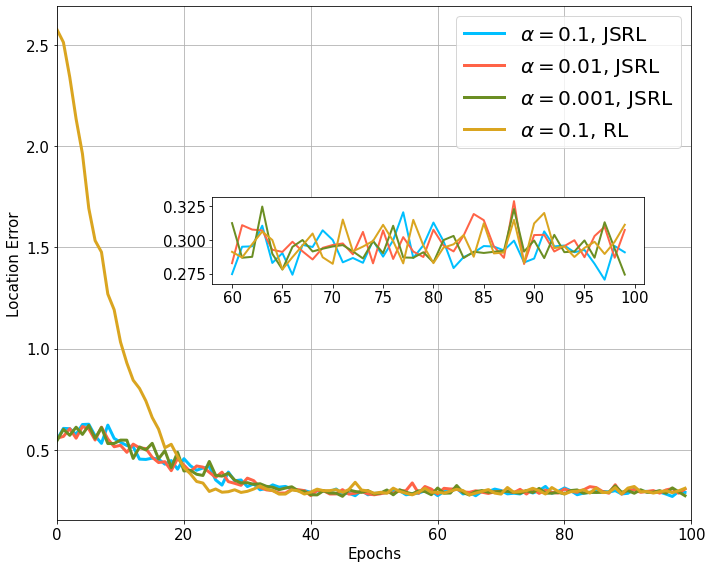

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Error_JSRL_learning1, 'deepskyblue', lw=3, label = r'$\alpha = 0.1$, JSRL')
plt.plot(Error_JSRL_learning01, 'tomato', lw=3, label =r'$\alpha = 0.01$, JSRL')
plt.plot(Error_JSRL_learning001, 'olivedrab', lw=3, label = r'$\alpha = 0.001$, JSRL')
plt.plot(Error_RL_learning1, 'goldenrod', lw=3, label =r'$\alpha = 0.1$, RL')
plt.legend(fontsize=20,loc = 'upper right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
axes = plt.axes([.3, .5, .6, .15])
x = np.array(range(60,100))
axes.plot(x,Error_JSRL_learning1[60:100], c='deepskyblue', lw=2)
axes.plot(x,Error_JSRL_learning01[60:100], c='tomato', lw=2)
axes.plot(x,Error_JSRL_learning001[60:100], c='olivedrab', lw=2)
axes.plot(x,Error_RL_learning1[60:100], c='goldenrod', lw=2)
plt.show()

**REWARD JSRL** 

In [ ]:
Reward_JSRL_learning1 = loadtxt('Reward_JSRL_learning1.csv', delimiter=',')
Reward_JSRL_learning01 = loadtxt('Reward_JSRL_learning01.csv', delimiter=',')
Reward_JSRL_learning001 = loadtxt('Reward_JSRL_learning001.csv', delimiter=',')
Reward_RL_learning1 = loadtxt('Reward_RL_learning1.csv', delimiter=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


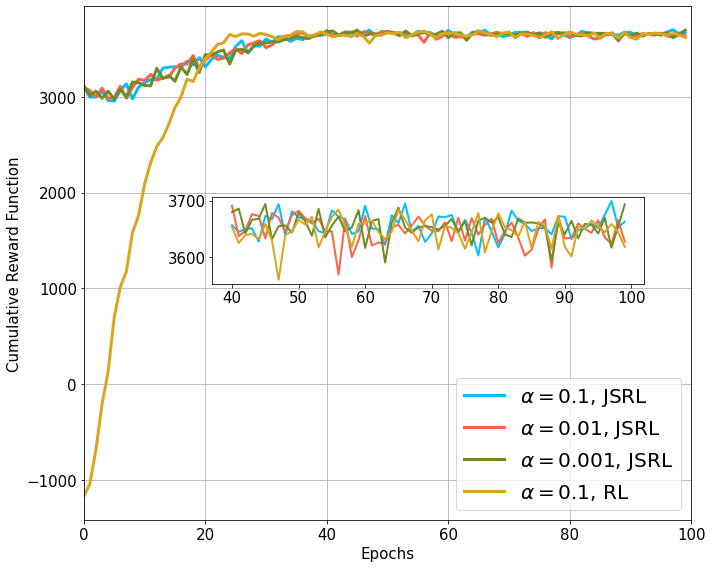

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Cumulative Reward Function", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Reward_JSRL_learning1, 'deepskyblue', lw=3, label = r'$\alpha = 0.1$, JSRL')
plt.plot(Reward_JSRL_learning01, 'tomato', lw=3, label =r'$\alpha = 0.01$, JSRL')
plt.plot(Reward_JSRL_learning001, 'olivedrab', lw=3, label = r'$\alpha = 0.001$, JSRL')
plt.plot(Reward_RL_learning1, 'goldenrod', lw=3, label =r'$\alpha = 0.1$, RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
axes = plt.axes([.3, .5, .6, .15])
x = np.array(range(40,100))
axes.plot(x,Reward_JSRL_learning1[40:100], c='deepskyblue', lw=2)
axes.plot(x,Reward_JSRL_learning01[40:100], c='tomato', lw=2)
axes.plot(x,Reward_JSRL_learning001[40:100], c='olivedrab', lw=2)
axes.plot(x,Reward_RL_learning1[40:100], c='goldenrod', lw=2)
plt.show()

**Epsilon Error_JSRL**

In [ ]:
Error_JSRL_learning1 = loadtxt('Error_JSRL_learning1.csv', delimiter=',')
Error_JSRL_learning1_epsilon1 = loadtxt('Error_JSRL_learning1_epsilon1.csv', delimiter=',')
Error_JSRL_learning1_epsilon9 = loadtxt('Error_JSRL_learning1_epsilon9.csv', delimiter=',')

Error_RL_learning1= loadtxt('Error_RL_learning1.csv', delimiter=',')
Error_RL_learning1_epsilon1 = loadtxt('Error_RL_epsilon1.csv', delimiter=',')
Error_RL_learning1_epsilon9 = loadtxt('Error_RL_epsilon9.csv', delimiter=',')

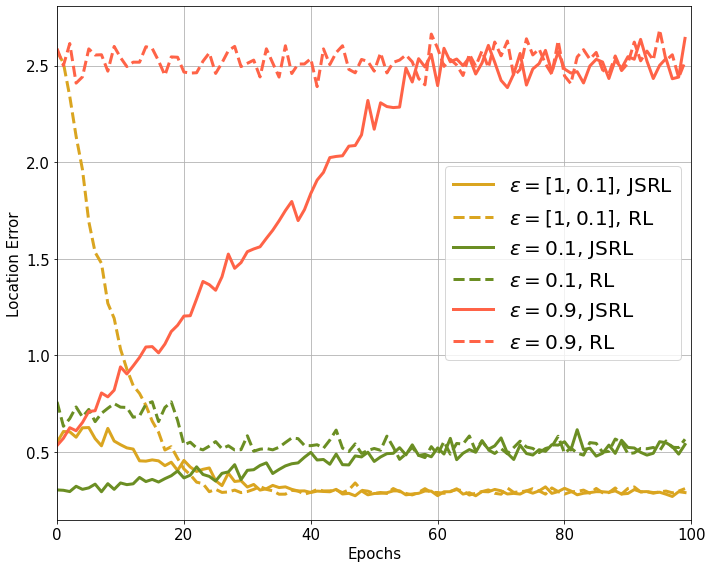

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Error_JSRL_learning1, 'goldenrod', lw=3, label = r'$\epsilon = [1,0.1]$, JSRL')
plt.plot(Error_RL_learning1, 'goldenrod' , linestyle='dashed' , lw=3, label =r'$\epsilon = [1,0.1]$, RL')
plt.plot(Error_JSRL_learning1_epsilon1, 'olivedrab', lw=3, label =r'$\epsilon = 0.1$, JSRL')
plt.plot(Error_RL_learning1_epsilon1, 'olivedrab', linestyle='dashed', lw=3, label =r'$\epsilon = 0.1$, RL')
plt.plot(Error_JSRL_learning1_epsilon9, 'tomato', lw=3, label = r'$\epsilon = 0.9$, JSRL')
plt.plot(Error_RL_learning1_epsilon9, 'tomato', linestyle='dashed', lw=3, label =r'$\epsilon = 0.9$, RL')
plt.legend(fontsize=20,loc = 'center right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

**Error Different H** 


In [ ]:
Error_JSRL_learning1_h10 = loadtxt('Error_JSRL_learning1_h10.csv', delimiter=',') #h=1
Error_JSRL_learning1_h9 = loadtxt('Error_JSRL_learning1.csv', delimiter=',') #h=0.9
Error_JSRL_learning1_h5 = loadtxt('Error_JSRL_learning1_h5.csv', delimiter=',') #0.5
Error_RL_learning1 = loadtxt('Error_RL_learning1.csv', delimiter=',') 

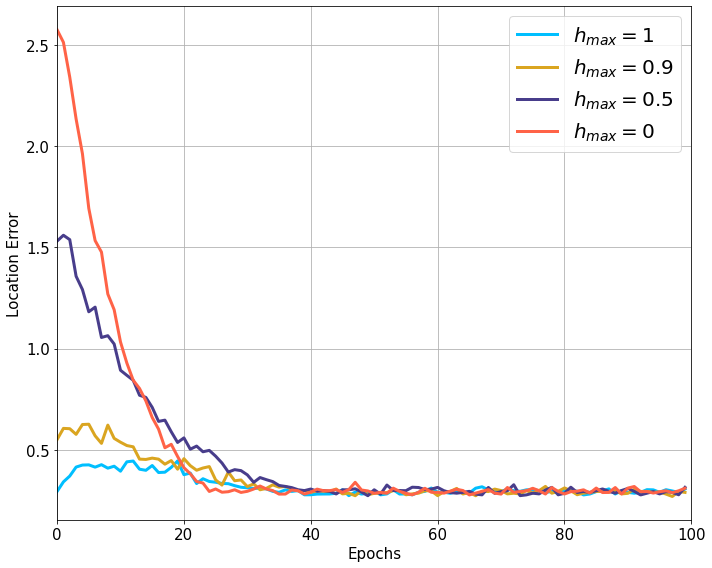

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Error_JSRL_learning1_h10, color='deepskyblue', lw=3, label = '$h_{max}=1$')
plt.plot(Error_JSRL_learning1_h9, 'goldenrod', lw=3, label ='$h_{max}=0.9$')
plt.plot(Error_JSRL_learning1_h5, 'darkslateblue', lw=3, label ='$h_{max}=0.5$')
plt.plot(Error_RL_learning1, 'tomato', lw=3, label = '$h_{max}=0$')
plt.legend(fontsize=20,loc = 'upper right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

**Different Policy**

In [ ]:
Error_JSRL_learning1_random = loadtxt('Error_JSRL_learning1_random.csv', delimiter=',') #h=1
Error_JSRL_learning1_RL = loadtxt('Error_JSRL_learning1.csv', delimiter=',') 
Error_RL_learning1 = loadtxt('Error_RL_learning1.csv', delimiter=',') 

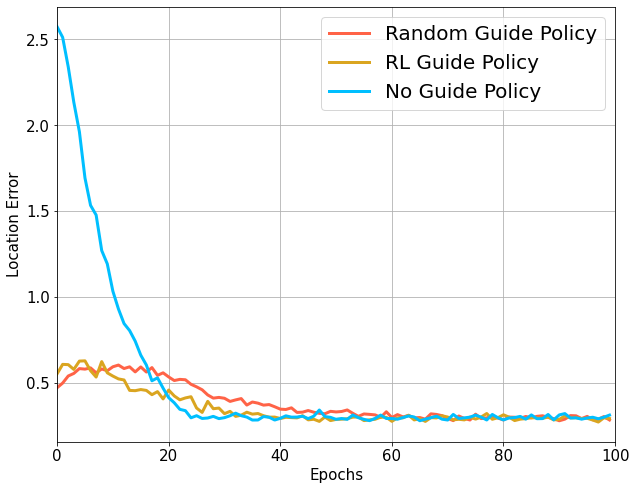

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Error_JSRL_learning1_random, color='tomato', lw=3, label = 'Random Guide Policy')
plt.plot(Error_JSRL_learning1_RL, 'goldenrod', lw=3, label ='RL Guide Policy')
plt.plot(Error_RL_learning1, 'deepskyblue', lw=3, label ='No Guide Policy')
plt.legend(fontsize=20,loc = 'upper right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [ ]:
Reward_JSRL_learning1_random = loadtxt('Reward_JSRL_learning1_radom.csv', delimiter=',') #h=1
Reward_JSRL_learning1_RL = loadtxt('Reward_JSRL_learning1.csv', delimiter=',') 
Reward_RL_learning1 = loadtxt('Reward_RL_learning1.csv', delimiter=',') 

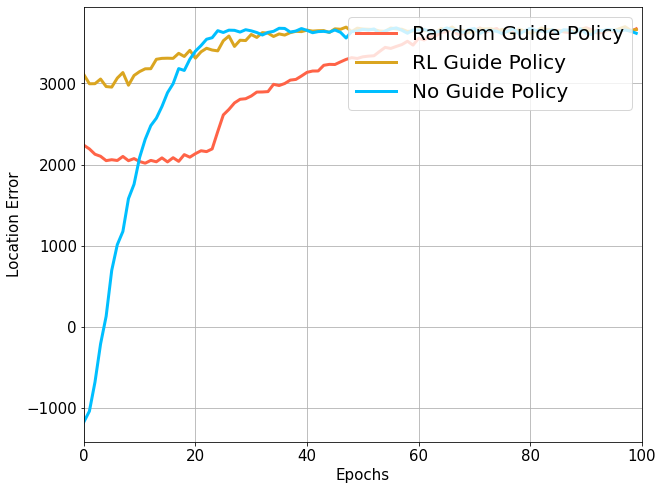

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Reward_JSRL_learning1_random, color='tomato', lw=3, label = 'Random Guide Policy')
plt.plot(Reward_JSRL_learning1_RL, 'goldenrod', lw=3, label ='RL Guide Policy')
plt.plot(Reward_RL_learning1, 'deepskyblue', lw=3, label ='No Guide Policy')
plt.legend(fontsize=20,loc = 'upper right')
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

JSRL

In [ ]:
q_table_policy = q_table

exploration 0.98
step_threshold 885.0
mean error 136.78706765881773
Reward 10743.09134861223
episode 0 
exploration 0.98
step_threshold 870.0
mean error 156.21622057766405
Reward 10444.223946667593
episode 1 
exploration 0.8857890438555999
step_threshold 855.0
mean error 148.27591025124678
Reward 10567.251795735874
episode 2 
exploration 0.800543445547202
step_threshold 840.0
mean error 150.80579410195006
Reward 10521.9270835589
episode 3 
exploration 0.7234100384749007
step_threshold 825.0
mean error 148.82985746001734
Reward 10537.309000034273
episode 4 
exploration 0.6536168455752829
step_threshold 810.0
mean error 150.89860885651254
Reward 10534.533125081038
episode 5 
exploration 0.5904653531155071
step_threshold 795.0
mean error 157.8070614352808
Reward 10404.391591721302
episode 6 
exploration 0.5333235197330861
step_threshold 780.0
mean error 137.99350457411296
Reward 10730.893519440497
episode 7 
exploration 0.4816194507534953
step_threshold 765.0
mean error 137.89812441091803

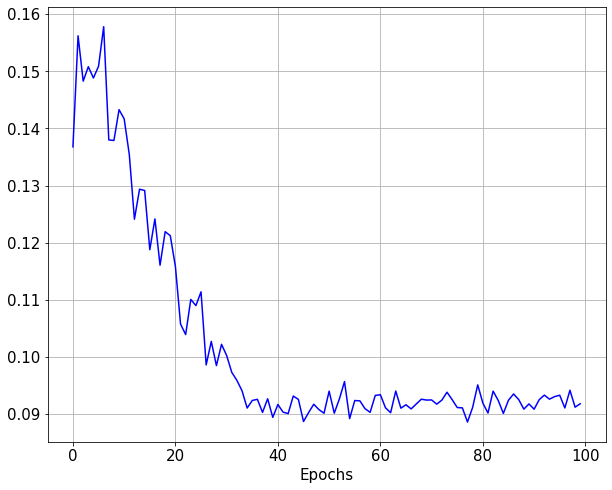

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
#plt.ylabel("Number of Pair Energy-Optimzed LoS Links", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue')

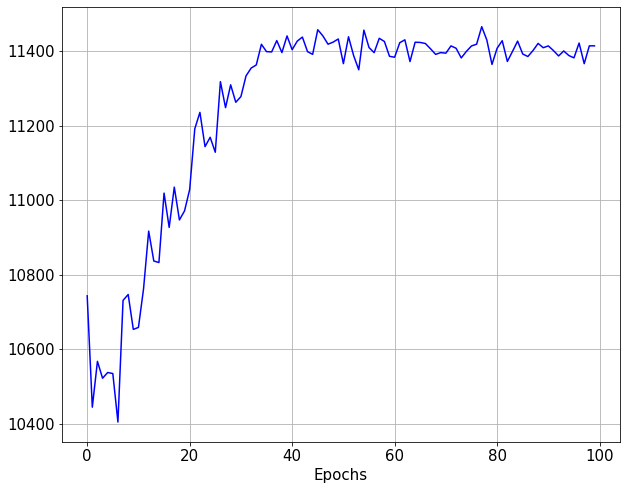

In [ ]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
#plt.ylabel("Number of Pair Energy-Optimzed LoS Links", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes_, color='blue')

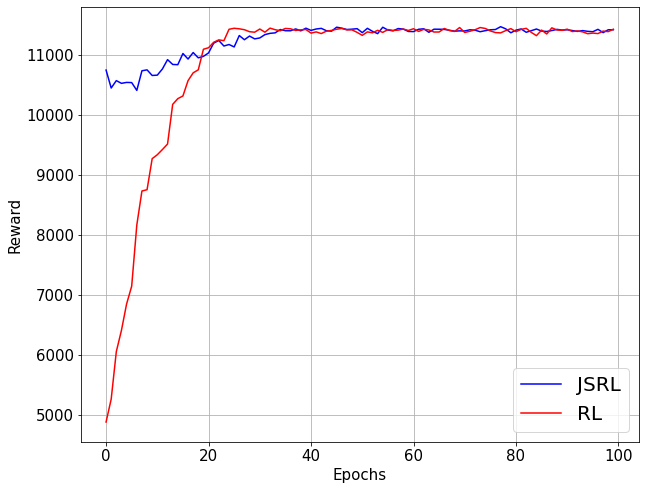

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Reward", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(rewards_all_episodes_, color='blue', label = 'JSRL')
plt.plot(rewards_all_episodes, color='red', label ='RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
#plt.xlim(0,300)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Reward", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(CUMULATIVE_ERROR_vector, color='blue', label = 'JSRL')
plt.plot(CUMULATIVE_ERROR_vector_RL, color='red', label ='RL')
plt.legend(fontsize=20,loc = 'lower right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,100)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Average Location Error", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(Error_RL_learning1, 'green', lw=2, label = r'$\alpha = 0.1$')
plt.plot(Error_RL_learning01, 'blue', lw=2, label =r'$\alpha = 0.01$')
plt.plot(Error_RL_learning001, 'cyan', lw=2, label = r'$\alpha = 0.001$')
plt.plot(Error_RL_learning0001, 'red', lw=2, label =r'$\alpha = 0.0001$')
plt.legend(fontsize=20,loc = 'upper right')
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
axes = plt.axes([.3, .5, .6, .15])
x = np.array(range(40,100))
axes.plot(x,Error_RL_learning1[40:100], c='green', lw=2)
axes.plot(x,Error_RL_learning01[40:100], c='blue', lw=2)
axes.plot(x,Error_RL_learning001[40:100], c='cyan', lw=2)
axes.plot(x,Error_RL_learning0001[40:100], c='red', lw=2)
plt.show()